<a href="https://colab.research.google.com/github/lxxhxng/aipython/blob/main/%ED%86%A0%EC%9D%B4%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 학습 데이터 로드
df_credit = pd.read_csv('/content/drive/MyDrive/IBA/german_credit_train.csv')
df_credit = df_credit.drop(columns = 'Unnamed: 0')
df_credit.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,28,male,2,own,NaN,moderate,1887,18,business,good
1,35,male,2,own,NaN,NaN,1979,15,radio/TV,good
2,20,female,2,own,rich,moderate,1577,11,furniture/equipment,good


# 칼럼 정보

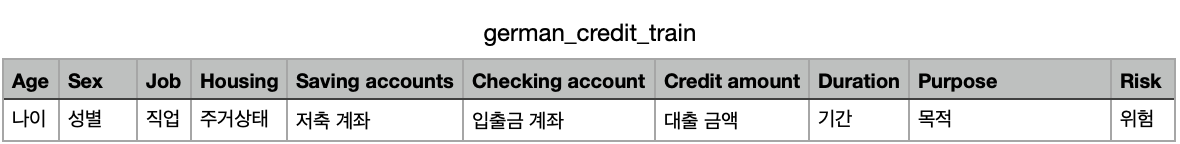

# 데이터 전처리(1)

## 결측치 처리

In [ ]:
# 데이터 정보 확인
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int64 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int64 
 3   Housing           800 non-null    object
 4   Saving accounts   656 non-null    object
 5   Checking account  487 non-null    object
 6   Credit amount     800 non-null    int64 
 7   Duration          800 non-null    int64 
 8   Purpose           800 non-null    object
 9   Risk              800 non-null    object
dtypes: int64(4), object(6)
memory usage: 62.6+ KB


In [ ]:
# 결측치 확인
df_credit.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     144
Checking account    313
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
# 결측치 제거 및 제거 여부 확인
# 결측치를 'Unknown' 값으로 대체
df_credit['Saving accounts'].fillna('Unknown', inplace = True)
df_credit['Checking account'].fillna('Unknown', inplace = True)
df_credit.isnull().sum()

# 결측치가 존재할경우 알고리즘이 제대로 작동하지 않을 수 있음

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
# 명목형 변수 확인
features = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
            'Purpose', 'Risk']
for feature in features:
    print(df_credit[feature].value_counts(), "\n\n")

male      537
female    263
Name: Sex, dtype: int64 


2    506
1    162
3    114
0     18
Name: Job, dtype: int64 


own     562
rent    149
free     89
Name: Housing, dtype: int64 


little        477
Unknown       144
moderate       86
quite rich     53
rich           40
Name: Saving accounts, dtype: int64 


Unknown     313
moderate    218
little      216
rich         53
Name: Checking account, dtype: int64 


car                    271
radio/TV               231
furniture/equipment    142
business                77
education               43
repairs                 18
domestic appliances     10
vacation/others          8
Name: Purpose, dtype: int64 


good    560
bad     240
Name: Risk, dtype: int64 




# EDA(1)

## Age

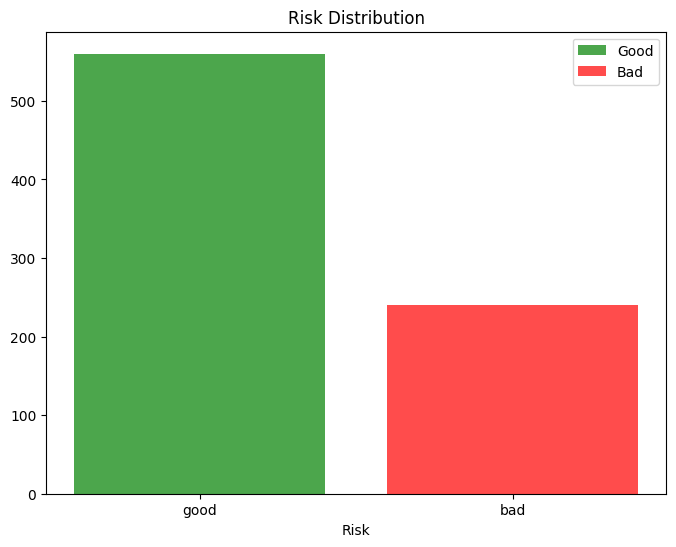

In [ ]:
# Risk 분포 히스토그램

# Good Risk 데이터
good_credit = df_credit[df_credit["Risk"] == 'good']["Risk"].value_counts().values
good_credit_label = df_credit[df_credit["Risk"] == 'good']["Risk"].value_counts().index.values

# Bad Risk 데이터
bad_credit = df_credit[df_credit["Risk"] == 'bad']["Risk"].value_counts().values
bad_credit_label = df_credit[df_credit["Risk"] == 'bad']["Risk"].value_counts().index.values

# 히스토그램 그리기
plt.figure(figsize=(8, 6))

plt.bar(good_credit_label, good_credit, color='green', alpha=0.7, label='Good')
plt.bar(bad_credit_label, bad_credit, color='red', alpha=0.7, label='Bad')

plt.title('Risk Distribution')
plt.xlabel('Risk')
plt.legend()

plt.show()


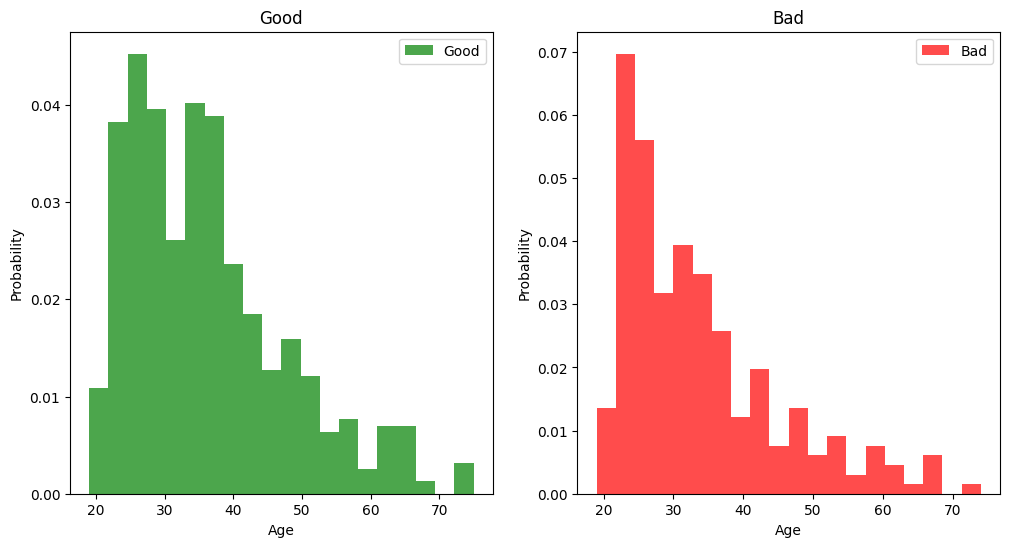

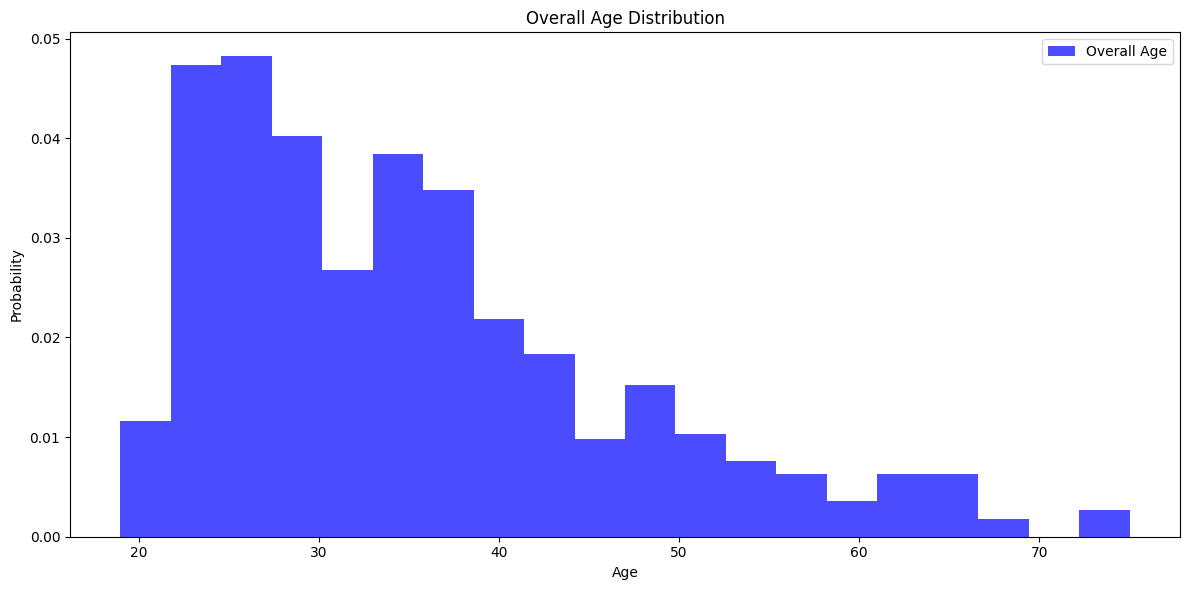

In [ ]:
# Age x Risk 히스토그램

df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age']
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age']
df_age = df_credit['Age']

# 히스토그램 그리기
plt.figure(figsize=(12, 6))

# Good 히스토그램
plt.subplot(121)
plt.hist(df_good, bins=20, density=True, color='green', alpha=0.7, label='Good')
plt.title('Good')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.legend()

# Bad 히스토그램
plt.subplot(122)
plt.hist(df_bad, bins=20, density=True, color='red', alpha=0.7, label='Bad')
plt.title('Bad')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.legend()

# 전체 연령 분포
plt.figure(figsize=(12, 6))
plt.hist(df_age, bins=20, density=True, color='blue', alpha=0.7, label='Overall Age')
plt.title('Overall Age Distribution')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Age 범주화 함수

def get_category(age):
    cat = ''
    if age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Tennager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'

    return cat

In [ ]:
df_credit['Age_cat'] = df_credit['Age'].apply(lambda x : get_category(x))

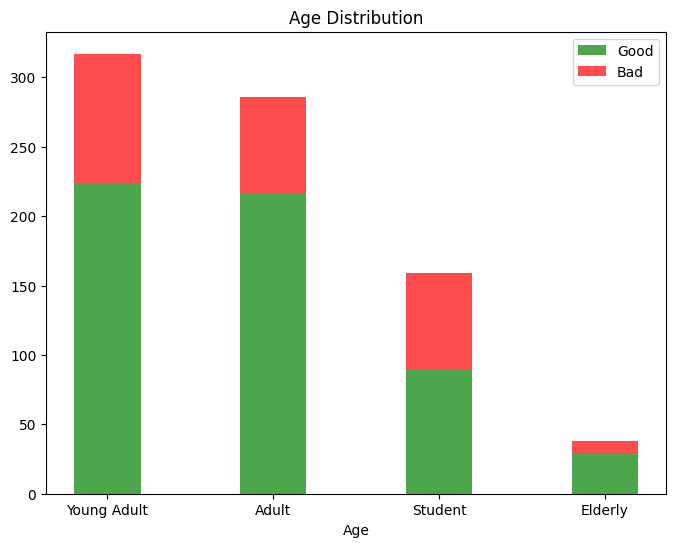

In [ ]:
# Age x Risk 막대 그래프

# Age에 따른 Good 및 Bad 데이터
age_cat_good = df_credit[df_credit["Risk"] == 'good']["Age_cat"].value_counts()
age_cat_bad = df_credit[df_credit["Risk"] == 'bad']["Age_cat"].value_counts()
age_cat_labels = age_cat_good.index.values

# 그래프 그리기
plt.figure(figsize=(8, 6))

# Sex에 따른 Good 및 Bad 막대 그래프
plt.bar(age_cat_labels, age_cat_good, width=0.4, color='green', alpha=0.7, label='Good')
plt.bar(age_cat_labels, age_cat_bad, width=0.4, bottom=age_cat_good, color='red', alpha=0.7, label='Bad')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.legend()

plt.show()


In [ ]:
# Age EDA 완료 후 'Age_cat'열 제거

df_credit.drop('Age_cat', axis=1, inplace=True)

## Sex

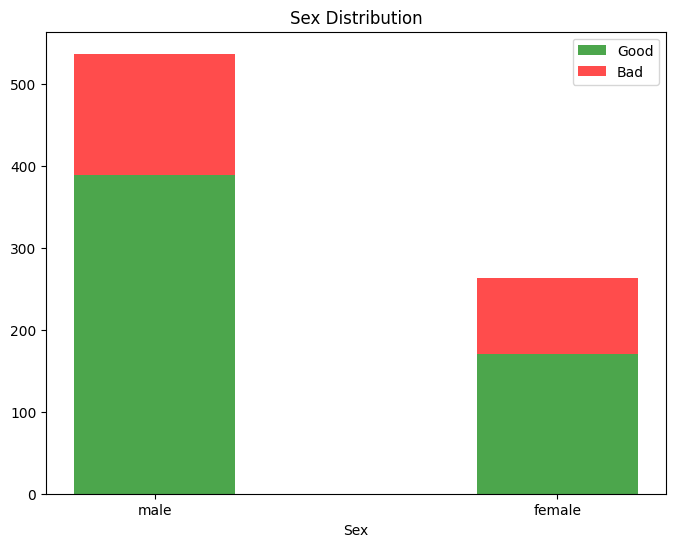

In [ ]:
# Sex x Risk 막대 그래프

# Sex에 따른 Good 및 Bad 데이터
sex_good = df_credit[df_credit["Risk"] == 'good']["Sex"].value_counts()
sex_bad = df_credit[df_credit["Risk"] == 'bad']["Sex"].value_counts()
sex_labels = sex_good.index.values

# 그래프 그리기
plt.figure(figsize=(8, 6))

# Sex에 따른 Good 및 Bad 막대 그래프
plt.bar(sex_labels, sex_good, width=0.4, color='green', alpha=0.7, label='Good')
plt.bar(sex_labels, sex_bad, width=0.4, bottom=sex_good, color='red', alpha=0.7, label='Bad')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.legend()

plt.show()


## Job

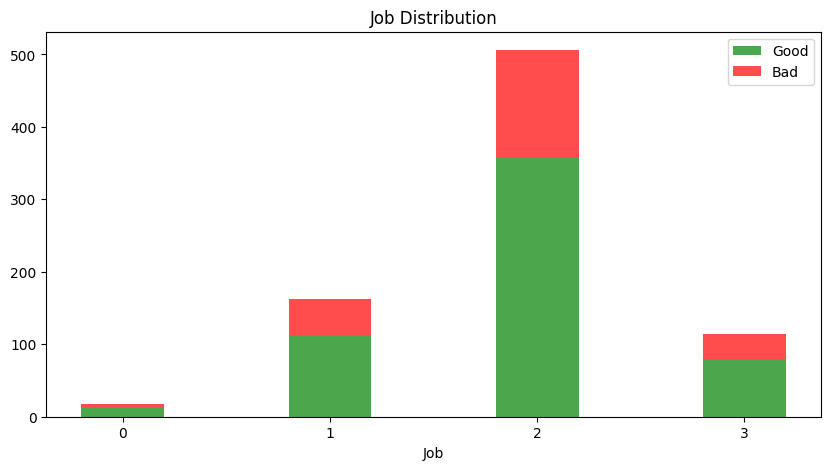

In [ ]:
# Job x Risk 막대 그래프

# Job에 따른 Good 및 Bad 데이터
job_good = df_credit[df_credit["Risk"] == 'good']["Job"].value_counts()
job_bad = df_credit[df_credit["Risk"] == 'bad']["Job"].value_counts()
job_labels = job_good.index.values

# 그래프 그리기
plt.figure(figsize=(10, 5))

# Job에 따른 Good 및 Bad 막대 그래프
plt.bar(job_labels, job_good, width=0.4, color='green', alpha=0.7, label='Good')
plt.bar(job_labels, job_bad, width=0.4, bottom=job_good, color='red', alpha=0.7, label='Bad')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.xticks(job_labels)
plt.legend()

plt.show()


## Housing

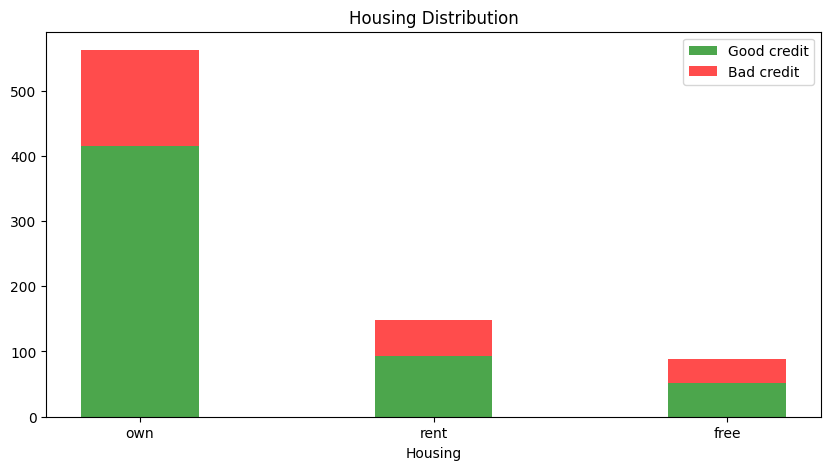

In [ ]:
# Housing x Risk 막대 그래프

# Housing에 따른 Good 및 Bad 데이터
housing_good = df_credit[df_credit["Risk"] == 'good']["Housing"].value_counts()
housing_bad = df_credit[df_credit["Risk"] == 'bad']["Housing"].value_counts()
housing_labels = housing_good.index.values

# 그래프 그리기
plt.figure(figsize=(10, 5))

# Housing에 따른 Good 및 Bad 막대 그래프
plt.bar(housing_labels, housing_good, width=0.4, color='green', alpha=0.7, label='Good credit')
plt.bar(housing_labels, housing_bad, width=0.4, bottom=housing_good, color='red', alpha=0.7, label='Bad credit')
plt.title('Housing Distribution')
plt.xlabel('Housing')
plt.legend()

plt.show()


## Saving accounts

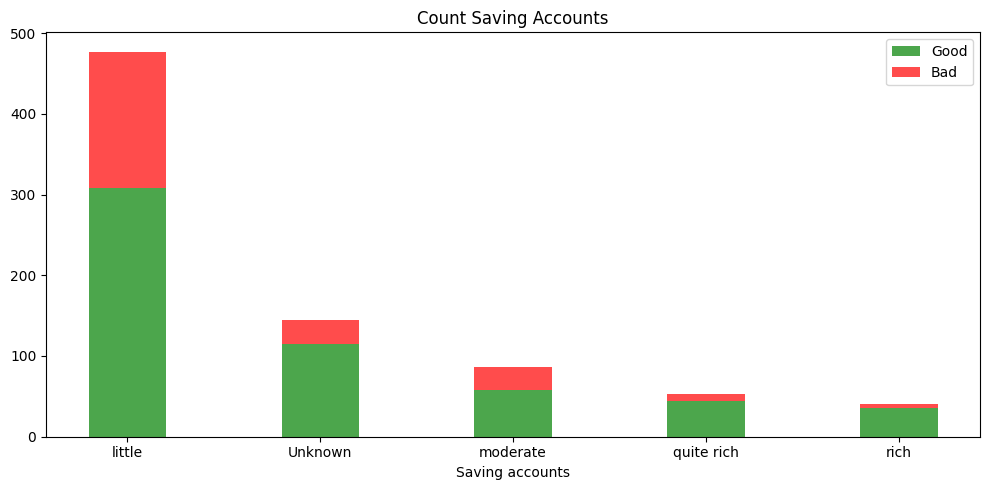

In [ ]:
# Saving accounts x Risk 막대 그래프

# Saving accounts에 따른 Good 및 Bad 데이터
saving_accounts_good = df_credit[df_credit["Risk"] == 'good']["Saving accounts"].value_counts()
saving_accounts_bad = df_credit[df_credit["Risk"] == 'bad']["Saving accounts"].value_counts()
saving_accounts_labels = saving_accounts_good.index.values

# 그래프 그리기
plt.figure(figsize=(10, 5))

# Count Saving Accounts 막대 그래프
plt.bar(saving_accounts_labels, saving_accounts_good, width=0.4, color='green', alpha=0.7, label='Good')
plt.bar(saving_accounts_labels, saving_accounts_bad, width=0.4, bottom=saving_accounts_good, color='red', alpha=0.7, label='Bad')
plt.title('Count Saving Accounts')
plt.xlabel('Saving accounts')
plt.legend()

plt.tight_layout()
plt.show()


## Checking account

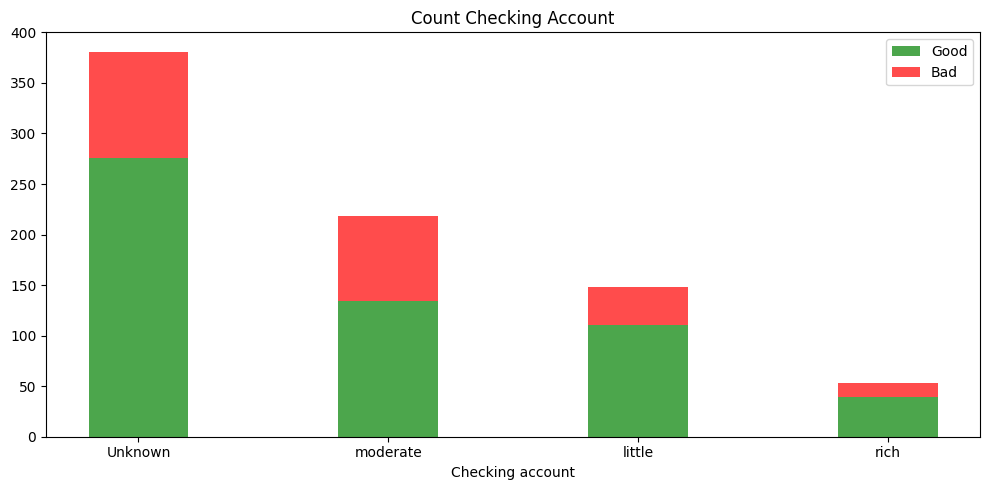

In [ ]:
# Checking account x Risk 막대 그래프

# Checking account에 따른 Good 및 Bad 데이터
checking_account_good = df_credit[df_credit["Risk"] == 'good']["Checking account"].value_counts()
checking_account_bad = df_credit[df_credit["Risk"] == 'bad']["Checking account"].value_counts()
checking_account_labels = checking_account_good.index.values

# 그래프 그리기
plt.figure(figsize=(10, 5))

# Count Checking Accounts 막대 그래프
plt.bar(checking_account_labels, checking_account_good, width=0.4, color='green', alpha=0.7, label='Good')
plt.bar(checking_account_labels, checking_account_bad, width=0.4, bottom=checking_account_good, color='red', alpha=0.7, label='Bad')
plt.title('Count Checking Account')
plt.xlabel('Checking account')
plt.legend()

plt.tight_layout()
plt.show()


## Credit amount

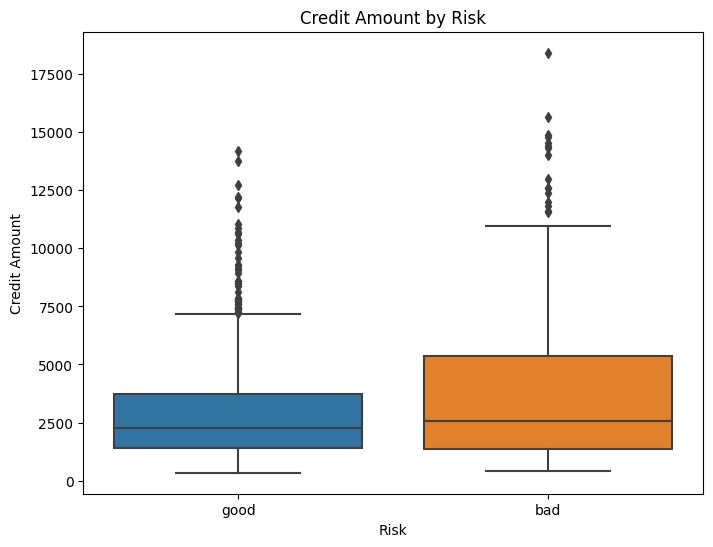

In [ ]:
# Credit amount x Risk 박스 플롯

# Credit amount 데이터
credit_amount_good = df_credit[df_credit["Risk"] == 'good']["Credit amount"]
credit_amount_bad = df_credit[df_credit["Risk"] == 'bad']["Credit amount"]

# seaborn을 사용한 박스 플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(x="Risk", y="Credit amount", data=df_credit)
plt.title('Credit Amount by Risk')
plt.xlabel('Risk')
plt.ylabel('Credit Amount')
plt.show()

## Duration

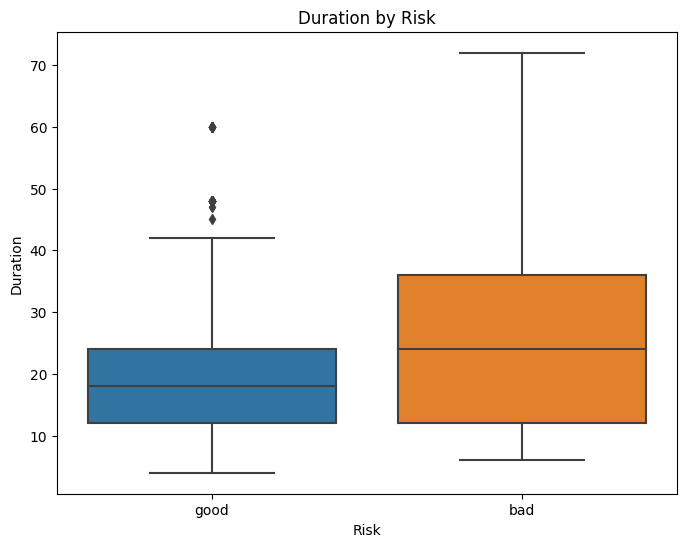

In [ ]:
# Duration x Risk 박스 플롯

# Duration 데이터
Duration_good = df_credit[df_credit["Risk"] == 'good']["Duration"]
Duration_bad = df_credit[df_credit["Risk"] == 'bad']["Duration"]

# seaborn을 사용한 박스 플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(x="Risk", y="Duration", data=df_credit)
plt.title('Duration by Risk')
plt.xlabel('Risk')
plt.ylabel('Duration')
plt.show()

## Purpose

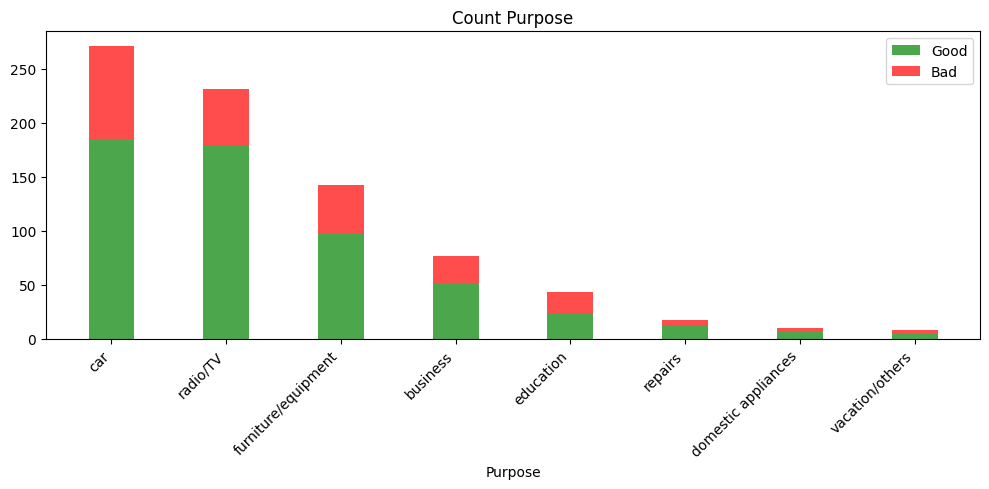

In [ ]:
# Purpose x Risk 막대 그래프

# Purpose에 따른 Good 및 Bad 데이터
Purpose_good = df_credit[df_credit["Risk"] == 'good']["Purpose"].value_counts()
Purpose_bad = df_credit[df_credit["Risk"] == 'bad']["Purpose"].value_counts()
Purpose_labels = Purpose_good.index.values

# 그래프 그리기
plt.figure(figsize=(10, 5))

# Count Checking Accounts 막대 그래프
plt.bar(Purpose_labels, Purpose_good, width=0.4, color='green', alpha=0.7, label='Good')
plt.bar(Purpose_labels, Purpose_bad, width=0.4, bottom=Purpose_good, color='red', alpha=0.7, label='Bad')
plt.title('Count Purpose')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Purpose')
plt.legend()

plt.tight_layout()
plt.show()


# 데이터 전처리(2)

## 문자열 데이터 인코딩

In [ ]:
# 문자열 데이터만 모아보기
cat_cols = [col for col in df_credit.columns if df_credit[col].dtypes == 'object']

for col in cat_cols:
    print(df_credit[col].value_counts(), "\n\n")

# 문자열 데이터는 상관관계를 계산할 수 없음
# 문자열 데이터는 모델이 인식 할 수 없음

male      537
female    263
Name: Sex, dtype: int64 


own     562
rent    149
free     89
Name: Housing, dtype: int64 


little        477
Unknown       144
moderate       86
quite rich     53
rich           40
Name: Saving accounts, dtype: int64 


Unknown     313
moderate    218
little      216
rich         53
Name: Checking account, dtype: int64 


car                    271
radio/TV               231
furniture/equipment    142
business                77
education               43
repairs                 18
domestic appliances     10
vacation/others          8
Name: Purpose, dtype: int64 


good    560
bad     240
Name: Risk, dtype: int64 




### Label Encoding

In [ ]:
# Label Encoding

from sklearn import preprocessing

features = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
la_encoder = preprocessing.LabelEncoder()
df_label_encoded = df_credit
for feature in features:
    df_label_encoded[feature] = la_encoder.fit_transform(df_credit[feature])

df_label_encoded

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,28,1,2,1,0,2,1887,18,0,1
1,35,1,2,1,0,0,1979,15,5,1
2,20,0,2,1,4,2,1577,11,4,1
3,24,0,1,1,1,1,626,12,5,0
4,55,1,2,1,1,1,6872,24,4,0
...,...,...,...,...,...,...,...,...,...,...
795,43,1,1,1,1,0,7393,24,1,1
796,37,1,1,1,1,2,2118,9,5,1
797,41,1,3,1,0,0,6313,24,1,1
798,33,1,2,1,0,0,3074,9,5,1


# EDA(2)

## 상관관계

In [ ]:
from scipy import stats
#p-value
list =[]
list = ['Sex','Housing','Job','Saving accounts','Checking account']

def p_value(column_name):
    correlation, p_value = stats.pearsonr(df_label_encoded['Risk'], df_label_encoded[column_name])
    return p_value

# result
for column in list:
    p_val = p_value(column)
    print(f"P-value for {column}: {p_val}")

P-value for Sex: 0.03145610100907361
P-value for Housing: 0.8866189214108905
P-value for Job: 0.9245986817041472
P-value for Saving accounts: 0.14740513563376198
P-value for Checking account: 6.953725816385046e-09


In [ ]:
#pearson correlation
import numpy as np
import pandas as pd

list =[]
list = ['Sex','Housing','Job','Saving accounts','Checking account']

def correlation(column_name):
   corr = df_label_encoded['Risk'].corr(df_label_encoded[column_name])  # pandas 사용
   return corr

# result
for column in list:
    corr = correlation(column)
    print(f"correlation for {column}: {corr}")



correlation for Sex: 0.07606706002502968
correlation for Housing: -0.00504895984470155
correlation for Job: 0.0033513534125934946
correlation for Saving accounts: 0.05126781235968809
correlation for Checking account: -0.20296180491269933


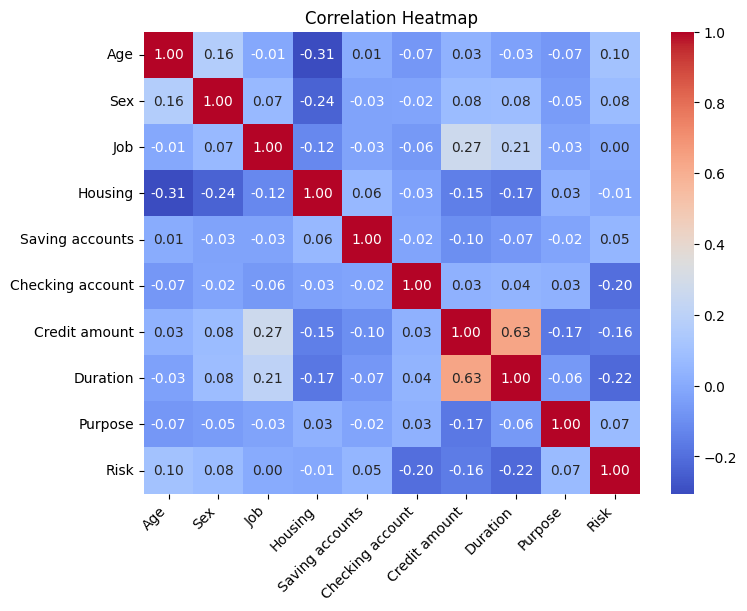

In [ ]:
# 상관 관계 행렬 계산
correlation_matrix = df_label_encoded.corr()

# 상관 관계 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.show()

# 모델 학습 및 평가

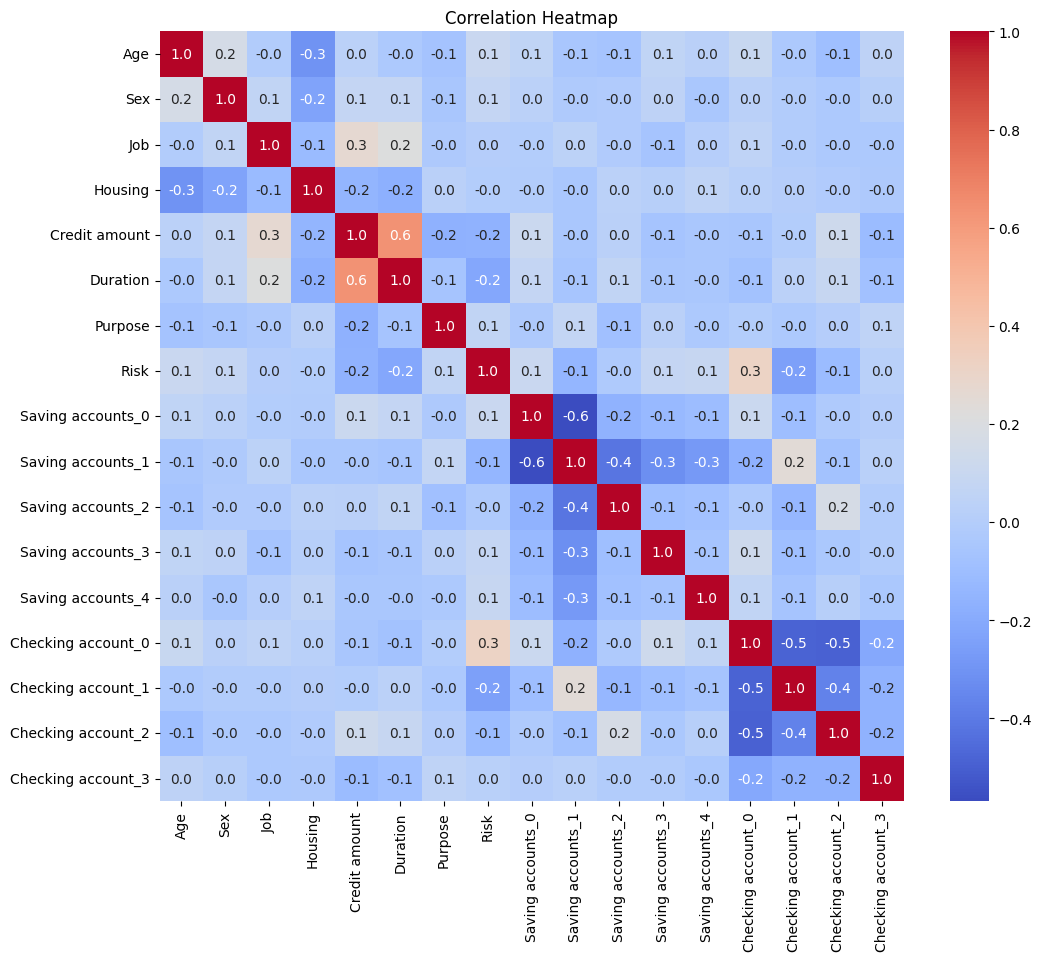

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df_credit, columns=["Saving accounts", "Checking account"])


# 상관 관계 행렬 계산
correlation_matrix = df_encoded.corr()

# 상관 관계 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # 데이터 나누기, 교차검증
from sklearn.metrics import f1_score, confusion_matrix, classification_report # 모델 평가

from sklearn.model_selection import GridSearchCV

# 분류모델
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
from sklearn.naive_bayes import GaussianNB # 가우시안 나이브 베이즈
from sklearn.neighbors import KNeighborsClassifier # k-최근접 이웃법
from sklearn.svm import SVC # 서포트벡터머신
from xgboost import XGBClassifier # XG부스트

### 모델링

In [ ]:
# X, y 데이터 나누기
X = df_label_encoded.drop(columns = 'Risk').values
y = df_label_encoded["Risk"].values
# 학습 / 테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Saving accounts 제거
X_no_saving = df_label_encoded.drop(columns = ['Risk', 'Saving accounts']).values
X_train_no_saving, X_test, y_train, y_test = train_test_split(X_no_saving, y, test_size = 0.3, random_state=42)

# Checking account 제거
X_no_checking = df_label_encoded.drop(columns = ['Risk', 'Checking account']).values
X_train_no_checking, X_test, y_train, y_test = train_test_split(X_no_checking, y, test_size = 0.3, random_state=42)

# Checking account, Saving accounts 둘다 제거
X_no_both = df_label_encoded.drop(columns = ['Risk', 'Saving accounts', 'Checking account']).values
X_train_no_both, X_test, y_train, y_test = train_test_split(X_no_both, y, test_size = 0.3, random_state=42)

In [ ]:
# 모델리스트 생성
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

RF: 0.797384
RF: 0.805868
RF: 0.773498
RF: 0.766209
NB: 0.779036
NB: 0.792078
NB: 0.783266
NB: 0.783153
KNN: 0.736391
KNN: 0.737926
KNN: 0.737021
KNN: 0.737021
SVM: 0.797492
SVM: 0.798698
SVM: 0.797492
SVM: 0.797492
XGB: 0.779312
XGB: 0.780684
XGB: 0.762924
XGB: 0.757422


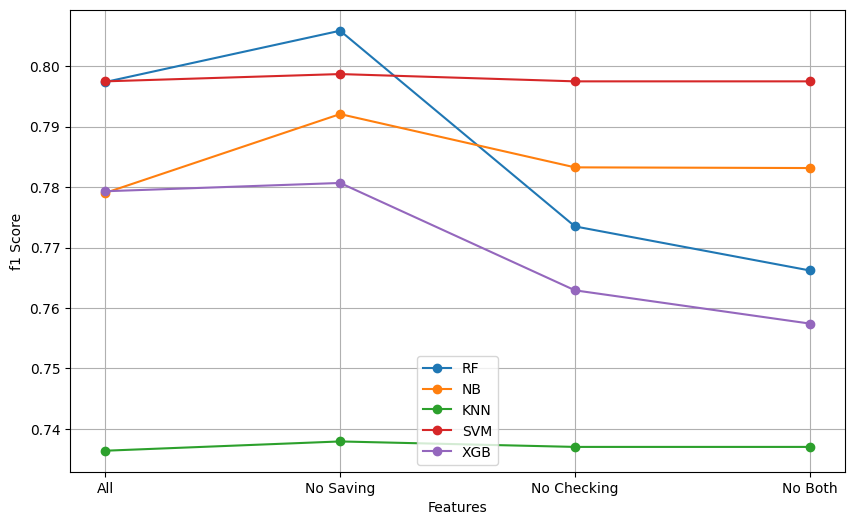

In [ ]:
# f1 스코어 결과 저장
f1_scores = []

# 모델과 경우의 수 반복
for name, model in models:
    f1_scores_case = []  # 각 경우별 F1 스코어를 저장할 리스트
    results = []
    names = []

    # 각 경우에 대해 반복
    for X_case in [X_train, X_train_no_saving, X_train_no_checking, X_train_no_both]:
        kfold = KFold(n_splits=8, random_state=7, shuffle=True)
        cv_results = cross_val_score(model, X_case, y_train, cv=kfold, scoring='f1')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f" % (name, cv_results.mean())
        print(msg)
        f1_scores_case.append(cv_results.mean())

    f1_scores.append((name, f1_scores_case))

# 그래프 그리기
plt.figure(figsize=(10, 6))
for name, scores in f1_scores:
    plt.plot(['All', 'No Saving', 'No Checking', 'No Both'], scores, marker='o', label=name)

plt.xlabel('Features')
plt.ylabel('f1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()


# 하이퍼파라미터 튜닝

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

### Random Forest

In [ ]:
# Saving accounts 제거
X_no_saving = df_label_encoded.drop(columns = ['Risk', 'Saving accounts']).values
X_train_no_saving, X_test, y_train, y_test = train_test_split(X_no_saving, y, test_size = 0.3, random_state=42)

model = RandomForestClassifier()
param_grid = {'max_depth':[2, 3, 5, 10],
              'min_samples_split':[2, 3, 5],
              'min_samples_leaf':[1, 5, 8],}

grid_rf = GridSearchCV(estimator=model, param_grid=param_grid, cv=8, scoring='f1')
grid_rf.fit(X_train_no_saving, y_train)

print("GridSearchCV 최적 하이퍼 파라미터 :", grid_rf.best_params_)
print("GridSearchCV 최고 F1_score: ", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)

print("테스트 세트에서의 F1_score: ", f1_score(y_test, y_pred))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 F1_score:  0.8212068162841413
테스트 세트에서의 F1_score:  0.8306878306878307


### Support Vector Machine

In [ ]:
# Saving accounts 제거
X_no_saving = df_label_encoded.drop(columns = ['Risk', 'Saving accounts']).values
X_train_no_saving, X_test, y_train, y_test = train_test_split(X_no_saving, y, test_size = 0.3, random_state=42)


model = SVC()
param_grid = {'C': [0.1, 1, 10],
              'gamma': ['scale', 'auto', 0.1, 1]}

grid_svc = GridSearchCV(estimator=model, param_grid=param_grid, cv=8, scoring='f1')
grid_svc.fit(X_train_no_saving, y_train)

print("GridSearchCV 최적 하이퍼 파라미터 :", grid_svc.best_params_)
print("GridSearchCV 최고 F1_score: ", grid_svc.best_score_)

best_svc = grid_svc.best_estimator_
y_pred = best_svc.predict(X_test)

print("테스트 세트에서의 F1_score: ", f1_score(y_test, y_pred))

GridSearchCV 최적 하이퍼 파라미터 : {'C': 1, 'gamma': 'scale'}
GridSearchCV 최고 F1_score:  0.8043826823794461
테스트 세트에서의 F1_score:  0.8761904761904762
